In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
## Variable Identification

In [6]:
# Category variables === > sex , cp , trestbps , fbs , restecg , exang , slope , thal
# Continuous variables === > age , trestbps , chol , thalach , oldpeak

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


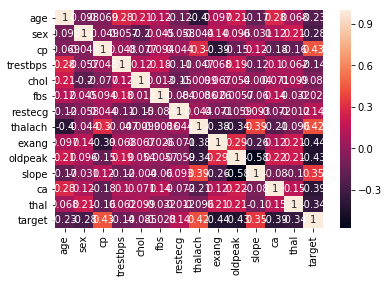

In [8]:
sns.heatmap(data.corr(), annot=True)

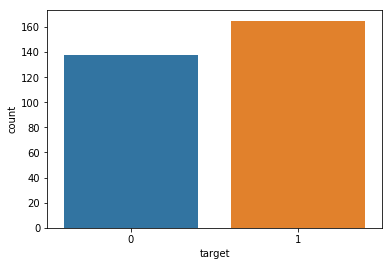

In [9]:
sns.countplot(data.target)

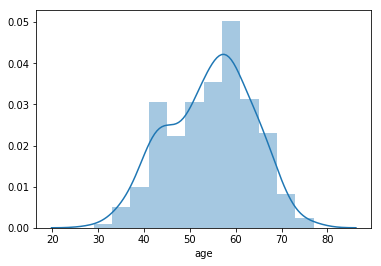

In [10]:
sns.distplot(data.age)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001968226B978>,
      dtype=object)

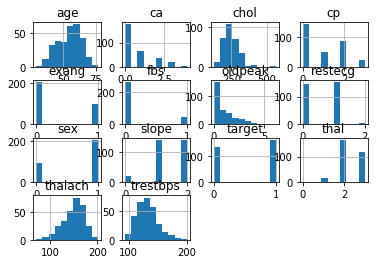

In [11]:
data.hist()

In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
data_clean = pd.get_dummies(data,columns=['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'thal'],drop_first=True)

In [14]:
data_clean.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [15]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
cols_ToScale = [ 'age' , 'trestbps' , 'chol' , 'thalach' , 'oldpeak']
data_clean[cols_ToScale] = stdScaler.fit_transform(data_clean[cols_ToScale])


C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sgajawad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
data_clean.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [18]:
data_clean.to_csv('data_clean.csv')

In [41]:
X = data_clean.drop('target',axis=1)
y = data_clean['target']

In [46]:
# split the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [96]:
X_test.head()
accuracies = {}

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [98]:
knn_params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]}
knn= KNeighborsClassifier()
grid_knn = GridSearchCV(knn,knn_params,scoring='accuracy',cv=10)
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [99]:
print(grid_knn.best_score_  , grid_knn.best_params_)

0.8370044052863436 {'n_neighbors': 8}


In [100]:
#y_pred = grid_knn.predict(X_test)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score
knn_score = accuracy_score(y_test,y_pred_knn)
accuracies["KNN"] = knn_score
knn_score

0.7105263157894737

In [103]:
from sklearn.tree import DecisionTreeClassifier


In [104]:
decision_tree = DecisionTreeClassifier()
decision_tree_params = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8]}
grid_tree = GridSearchCV(decision_tree,decision_tree_params,cv=10,refit=True)
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
print(grid_tree.best_score_ , grid_tree.best_params_)

0.775330396475771 {'criterion': 'entropy', 'max_depth': 4}


In [106]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt.fit(X_train,y_train)
y_pred_dtree = dt.predict(X_test)

In [108]:
y_pred = grid_tree.predict(X_test)
decision_tree_score = accuracy_score(y_test,y_pred_dtree)
accuracies["DecisionTree"]=decision_tree_score
decision_tree_score


0.6973684210526315

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
random_forest = RandomForestClassifier()
random_forest_grid_prams = {'criterion':['gini','entropy'],'n_estimators':[100,500,1000],'max_features':range(3,20)}
random_forest_grid = GridSearchCV(random_forest , random_forest_grid_prams,cv=10)
random_forest_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [100, 500, 1000], 'max_features': range(3, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
print(random_forest_grid.best_score_ , random_forest_grid.best_params_)

0.8370044052863436 {'criterion': 'entropy', 'max_features': 3, 'n_estimators': 100}


In [109]:
rf = RandomForestClassifier(criterion='entropy',max_features=3,n_estimators=100)
rf.fit(X_train,y_train)
y_pred_Randomforest=rf.predict(X_test)

In [118]:
rf_score = accuracy_score(y_test,y_pred_Randomforest)
accuracies["RandomForest"]= rf_score
rf_score

0.7631578947368421

In [112]:
from sklearn.naive_bayes import GaussianNB

In [119]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
nb_score = accuracy_score(y_test,y_pred_nb)
accuracies["GaussianNB"] = nb_score
nb_score

0.7631578947368421

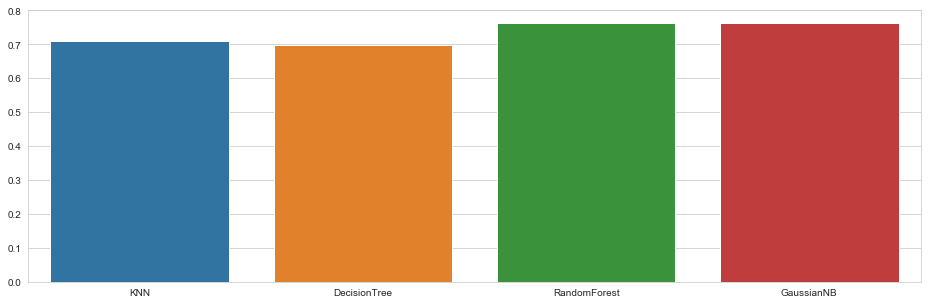

In [117]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))

In [120]:
from sklearn.metrics import confusion_matrix

knn_cm = confusion_matrix(y_test,y_pred_knn)
dt_cm = confusion_matrix(y_test,y_pred_dtree)
rf_cm = confusion_matrix(y_test,y_pred_Randomforest)
nb_cm = confusion_matrix(y_test,y_pred_nb)